In [1]:
# Importações

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


from src.config import DADOS_TRATADOS, DADOS_DUMMIES
from src.graficos import pairplot, plot_bivariate_boxplot, plot_corr_barplot
from src.utils import inspect_outliers

In [2]:
# Obtendo os dados como DataFrame
df = pd.read_parquet(DADOS_TRATADOS)
df.head()

Education Marital_Status   Income  Kidhome  Teenhome  Recency  MntWines  \
0  Graduation         Single  58138.0        0         0       58       635   
1  Graduation         Single  46344.0        1         1       38        11   
2  Graduation        Partner  71613.0        0         0       26       426   
3  Graduation        Partner  26646.0        1         0       26        11   
4         PhD        Partner  58293.0        1         0       94       173   

   MntFruits  MntMeatProducts  MntFishProducts  ...  YearsSinceEnrolled  Age  \
0         88              546              172  ...                   1   57   
1          1                6                2  ...                   0   60   
2         49              127              111  ...                   0   49   
3          4               20               10  ...                   0   30   
4         43              118               46  ...                   0   33   

   MntTotal  MntRegularProds  Children  hasChildren  AcceptedCmpTotal  \
0      1617             1529         0            0                 0   
1        27               21         2            1                 0   
2       776              734         0            0                 0   
3        53               48         1            1                 0   
4       422              407         1            1                 0   

   HasAcceptedCmp  NumPurchasesTotal  AgeGroup  
0               0                 22     46-60  
1               0                  4     46-60  
2               0                 20     46-60  
3               0                  6     18-30  
4               0                 14     31-45  

[5 rows x 35 columns]

In [3]:
# Resumo da base
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2197 entries, 0 to 2196
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Education            2197 non-null   object  
 1   Marital_Status       2197 non-null   object  
 2   Income               2197 non-null   float64 
 3   Kidhome              2197 non-null   int64   
 4   Teenhome             2197 non-null   int64   
 5   Recency              2197 non-null   int64   
 6   MntWines             2197 non-null   int64   
 7   MntFruits            2197 non-null   int64   
 8   MntMeatProducts      2197 non-null   int64   
 9   MntFishProducts      2197 non-null   int64   
 10  MntSweetProducts     2197 non-null   int64   
 11  MntGoldProds         2197 non-null   int64   
 12  NumDealsPurchases    2197 non-null   int64   
 13  NumWebPurchases      2197 non-null   int64   
 14  NumCatalogPurchases  2197 non-null   int64   
 15  NumStorePurchases    

In [4]:
# Resumo estatístico das colunas numéricas
df.describe()

Income      Kidhome     Teenhome      Recency     MntWines  \
count    2197.000000  2197.000000  2197.000000  2197.000000  2197.000000   
mean    51953.028675     0.442421     0.503414    49.377788   303.172508   
std     21456.836258     0.538992     0.545400    28.929035   335.495086   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35523.000000     0.000000     0.000000    25.000000    24.000000   
50%     51117.500000     0.000000     0.000000    50.000000   174.000000   
75%     68397.000000     1.000000     1.000000    74.000000   504.000000   
max    162397.000000     2.000000     2.000000    99.000000  1493.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2197.000000      2197.000000      2197.000000       2197.000000   
mean     26.496131       167.102412        37.657715         27.165680   
std      39.903397       225.045935        54.528675         41.275297   
min       0.000000         0.000000         0.000000          0.000000   
25%       2.000000        16.000000         3.000000          1.000000   
50%       8.000000        68.000000        12.000000          8.000000   
75%      33.000000       234.000000        50.000000         34.000000   
max     199.000000      1725.000000       259.000000        263.000000   

       MntGoldProds  ...  DaysSinceEnrolled  YearsSinceEnrolled          Age  \
count   2197.000000  ...        2197.000000         2197.000000  2197.000000   
mean      43.698225  ...         352.424215            0.481111    45.243514   
std       51.791823  ...         201.607084            0.499757    11.998799   
min        0.000000  ...           0.000000            0.000000    18.000000   
25%        9.000000  ...         180.000000            0.000000    37.000000   
50%       24.000000  ...         353.000000            0.000000    44.000000   
75%       56.000000  ...         526.000000            1.000000    55.000000   
max      362.000000  ...         699.000000            1.000000   121.000000   

          MntTotal  MntRegularProds     Children  hasChildren  \
count  2197.000000      2197.000000  2197.000000  2197.000000   
mean    605.292672       561.594447     0.945835     0.713245   
std     600.958339       575.325973     0.751609     0.452349   
min       5.000000         4.000000     0.000000     0.000000   
25%      68.000000        55.000000     0.000000     0.000000   
50%     395.000000       341.000000     1.000000     1.000000   
75%    1042.000000       962.000000     1.000000     1.000000   
max    2524.000000      2491.000000     3.000000     1.000000   

       AcceptedCmpTotal  HasAcceptedCmp  NumPurchasesTotal  
count       2197.000000     2197.000000        2197.000000  
mean           0.294948        0.203459          12.540737  
std            0.679143        0.402663           7.208248  
min            0.000000        0.000000           0.000000  
25%            0.000000        0.000000           6.000000  
50%            0.000000        0.000000          12.000000  
75%            0.000000        0.000000          18.000000  
max            4.000000        1.000000          32.000000  

[8 rows x 32 columns]

In [5]:
# Resumo estatístico das colunas categóricas
df.describe(exclude="number")

Education Marital_Status AgeGroup
count         2197           2197     2197
unique           5              2        4
top     Graduation        Partner    31-45
freq          1115           1421      955

Iremos analisar o comportamento de algumas colunas a partir de pairplots, destacando os pontos de determinadas categorias em uma coluna categórica.

In [6]:
# Colunas de análise

analysis_columns = [
    "Income",
    "Recency",
    "DaysSinceEnrolled",
    "Age",
    "MntTotal"
]

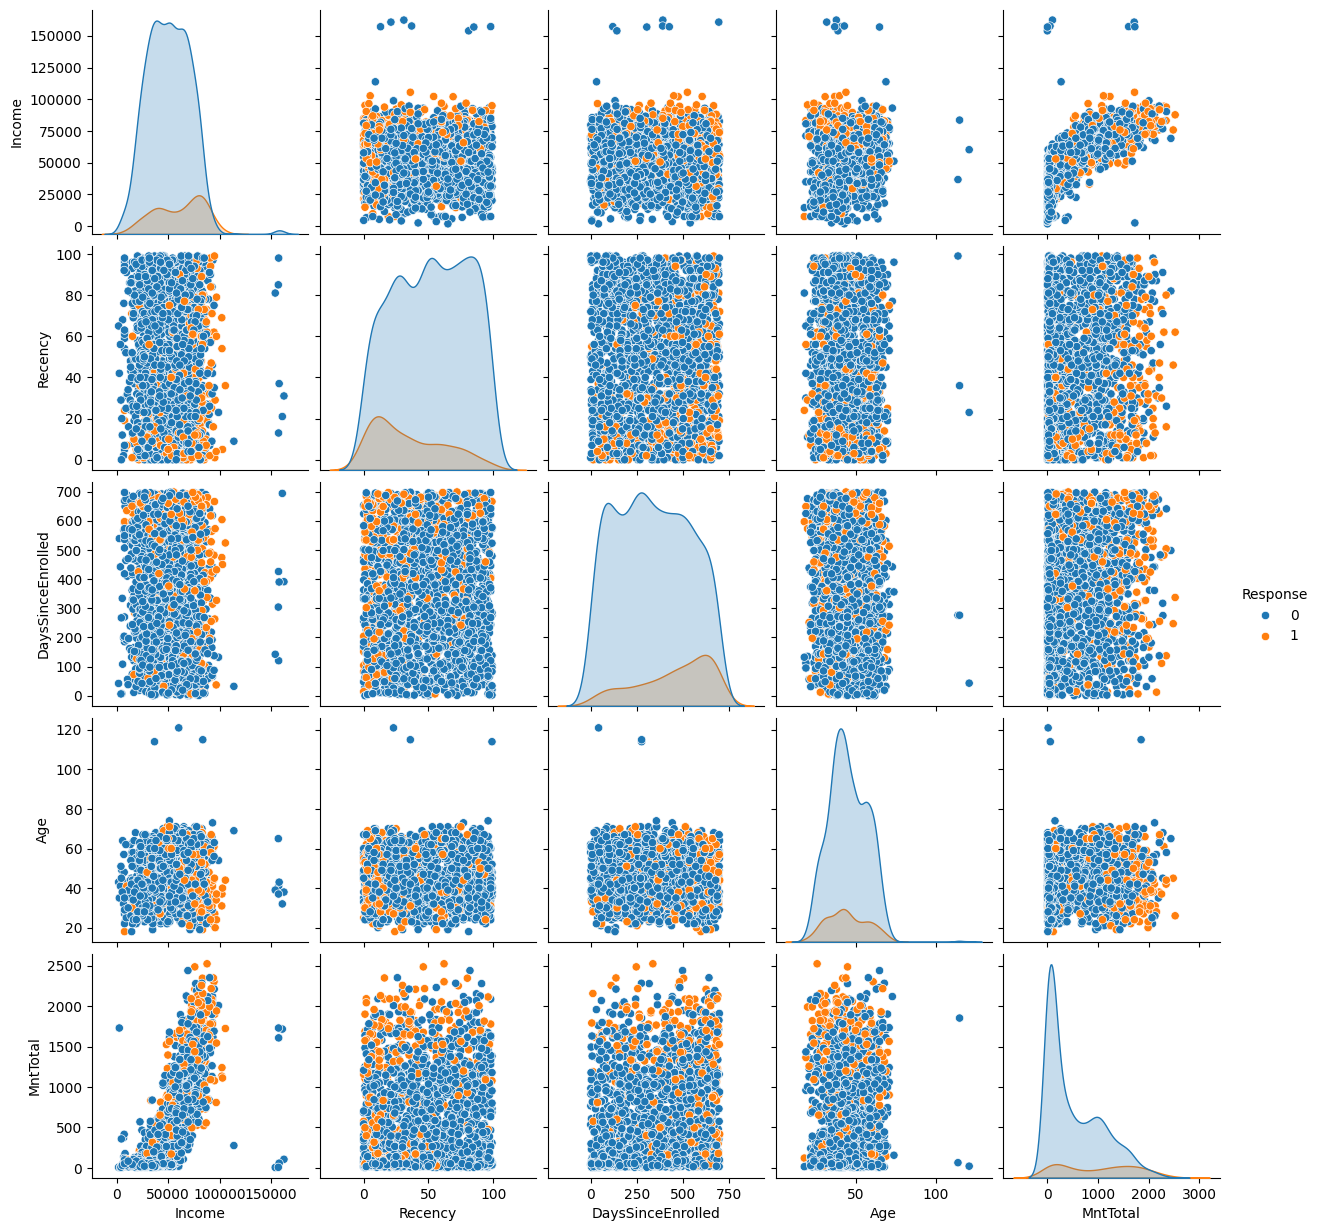

In [7]:
# Analisando pairplot para cada valor de Response
pairplot(df, analysis_columns, "Response")

- Concentração de registros com `Response` 1 em valores maiores de `Income`
- Concentração de registros com `Response` 1 em valores menores de `Recency`
- Concentração de registros com `Response` 1 em valores maiores de `DaysSinceEnrolled`
- Concentração de registros com `Response` 0 em valores pequenos de `MntTotal`

Podemos observar também poucas ocorrências em valores grandes de `Income` para a classe 0 de `Response`.

Esses valores correspondem aos demais outliers que não foram removidos anteriormente de `Income`.

Esses registros podem levar a captura de ruído indesejável. Logo, optarei por removê-los, apesar deles não parecerem errôneios.

In [8]:
# Removendo os outliers de Income

remove_indexes = inspect_outliers(df, "Income").index

df = df.drop(remove_indexes, axis=0)

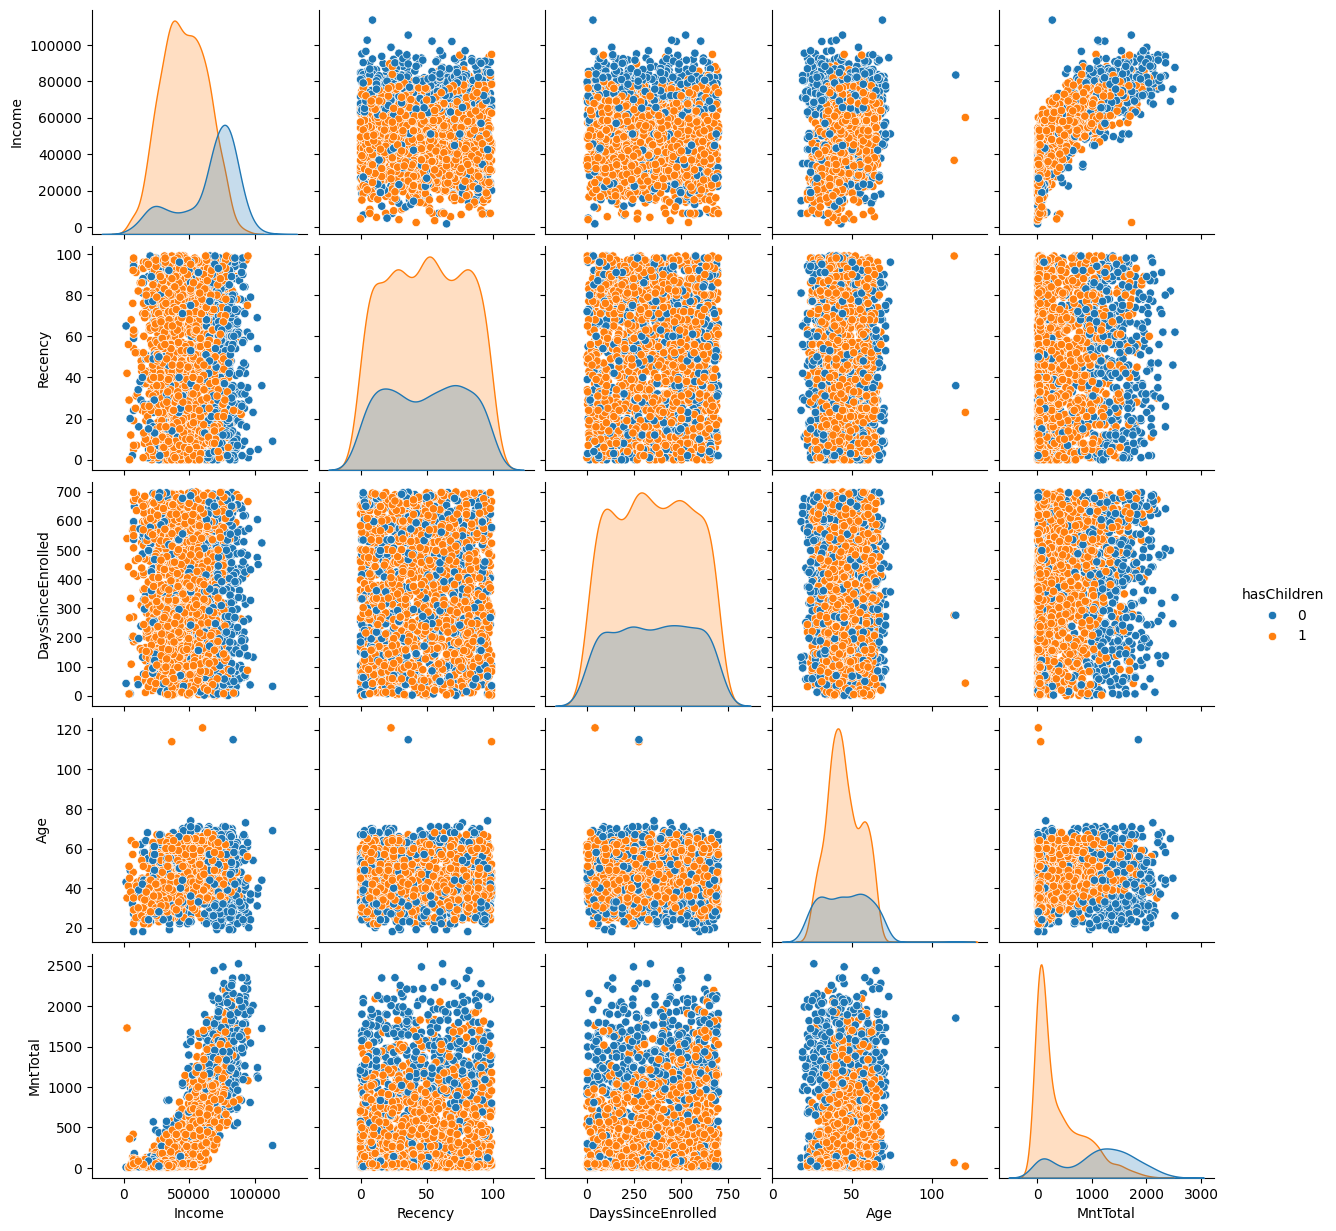

In [9]:
# Analisando o pairplot para cada valor de hasChildren
pairplot(df, analysis_columns, "hasChildren") 

- Concentração de registros da categoria 0 de `hasChildren` em valores maiores de `Income`
- Concentração de registros da categoria 1 de `hasChildren` em valores pequenos de `MntTotal`

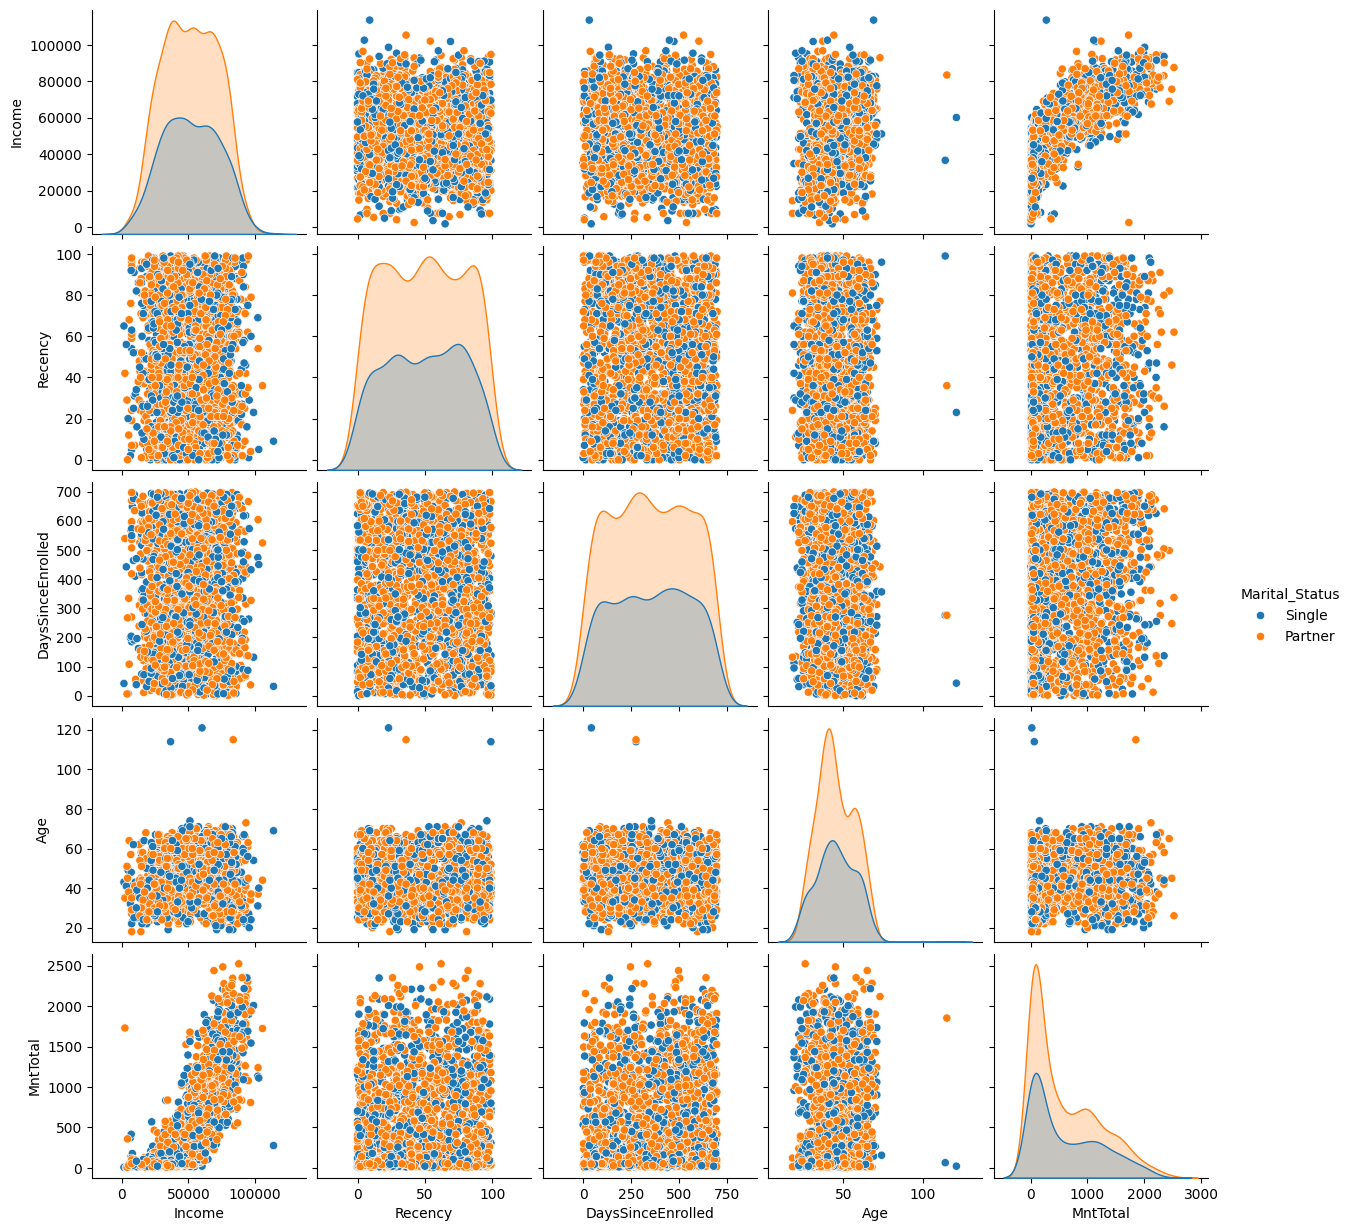

In [10]:
# Analisando pairplot para cada valor de Marital_Status
pairplot(df, analysis_columns, "Marital_Status")

Existe pouca diferença entre as categorias de `Marital_Status`.

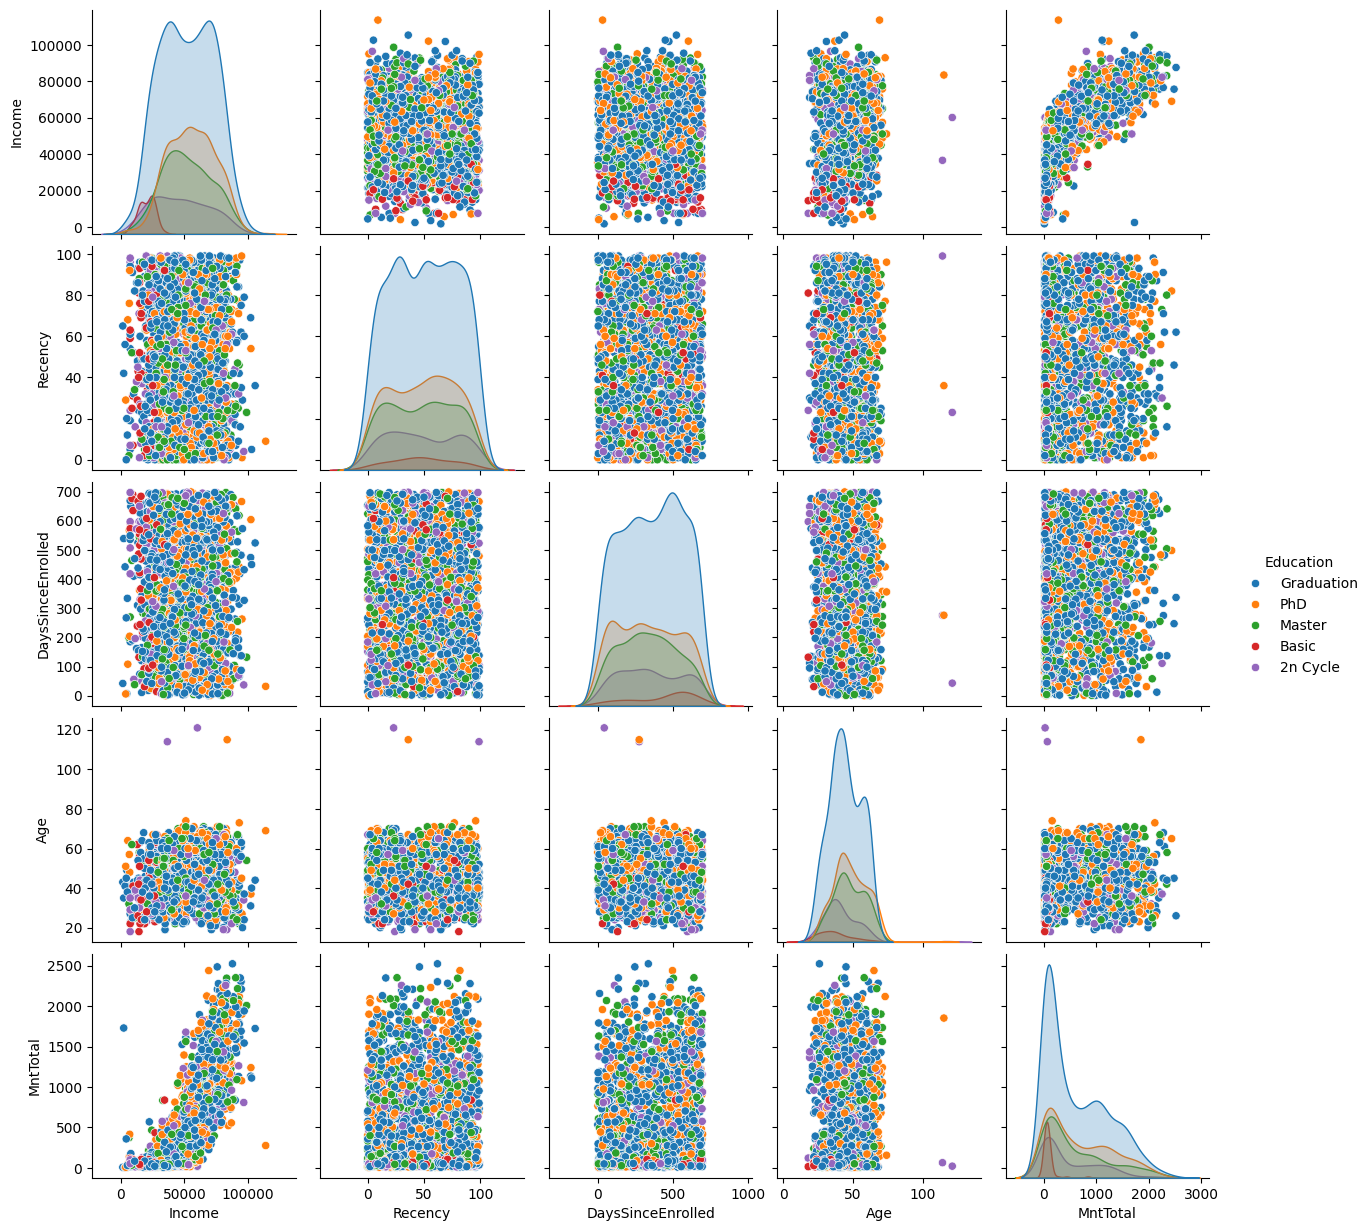

In [11]:
# Analisando pairplot para cada valor de Education
pairplot(df, analysis_columns, "Education")

- Concentração em valores pequenos de `Income` para registros categorizados como 'Basic' em `Education`
- Concentração em valores pequenos de `MntTotal` para registros categorizados como 'Basic' em `Education`

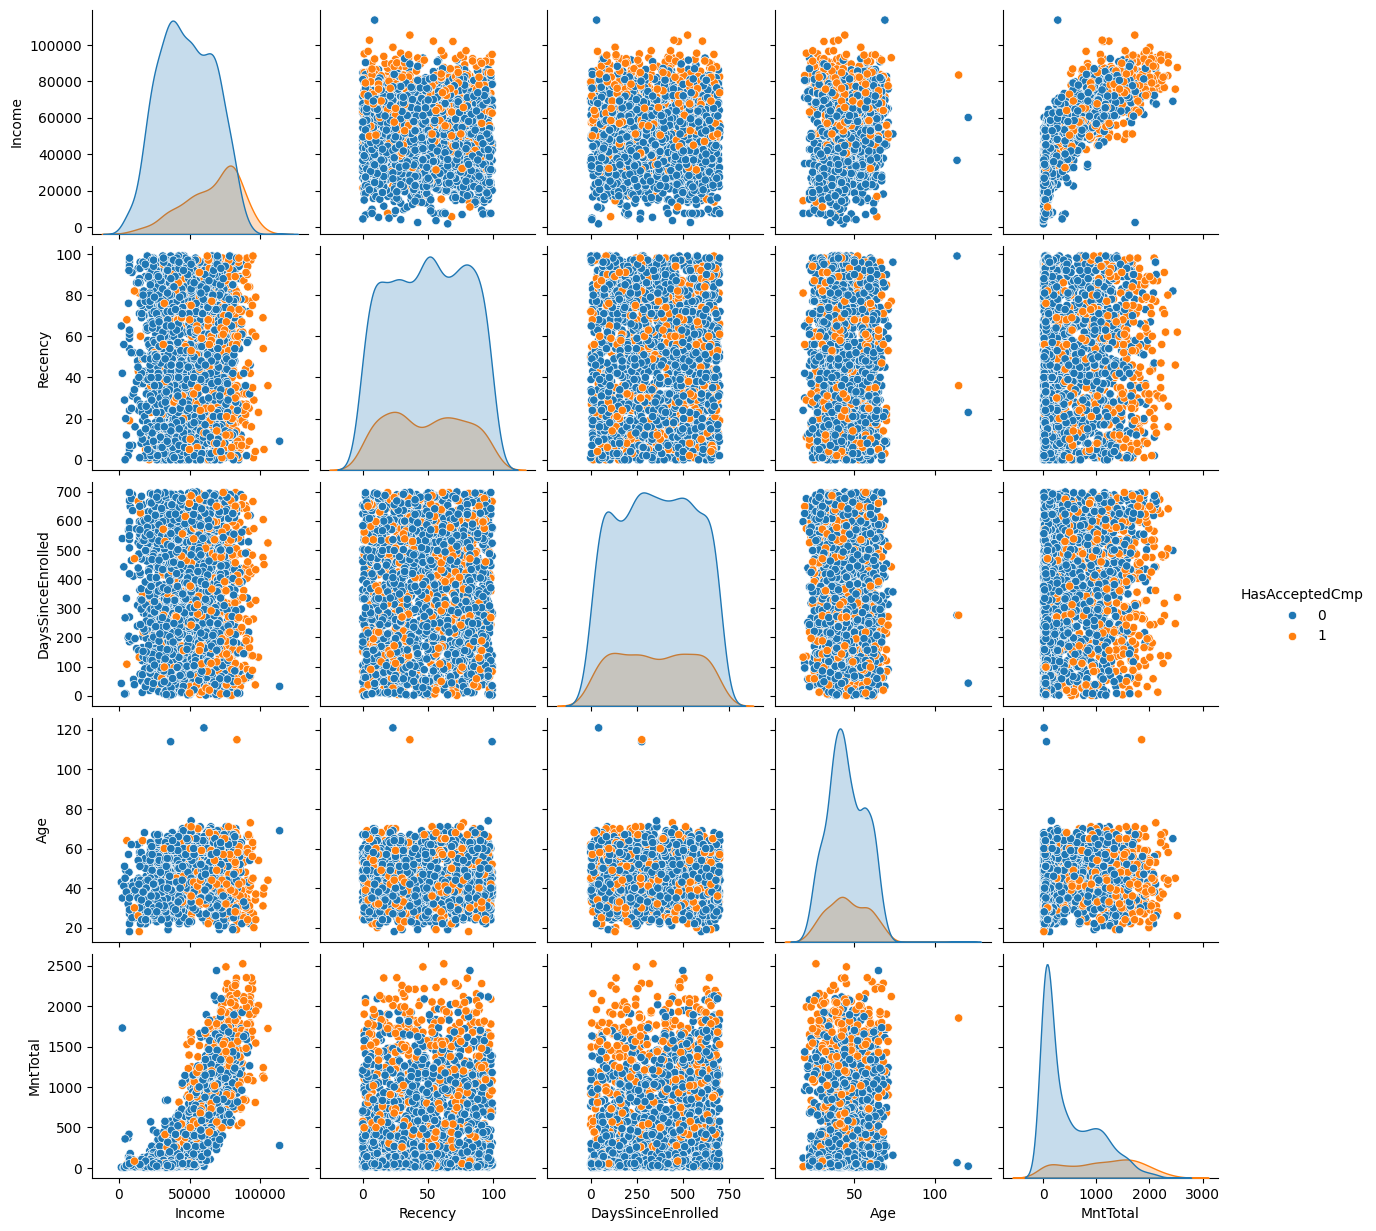

In [12]:
# Analisando pairplot para cada valor de HasAcceptedCmp
pairplot(df, analysis_columns, "HasAcceptedCmp")

- Concentração em valores maiores de `Income` para registros de categoria 1 em `HasAcceptedCmp`
- Concentração em valores menores de `Income` para registros de categoria 0 em `HasAcceptedCmp`
- Quantidade de registros da classe 1 de `HasAcceptedCmp` considerável em valores grandes de `MntTotal`
- Concentração em valores menores de `MntTotal` para registros de categoria 0 em `HasAcceptedCmp`

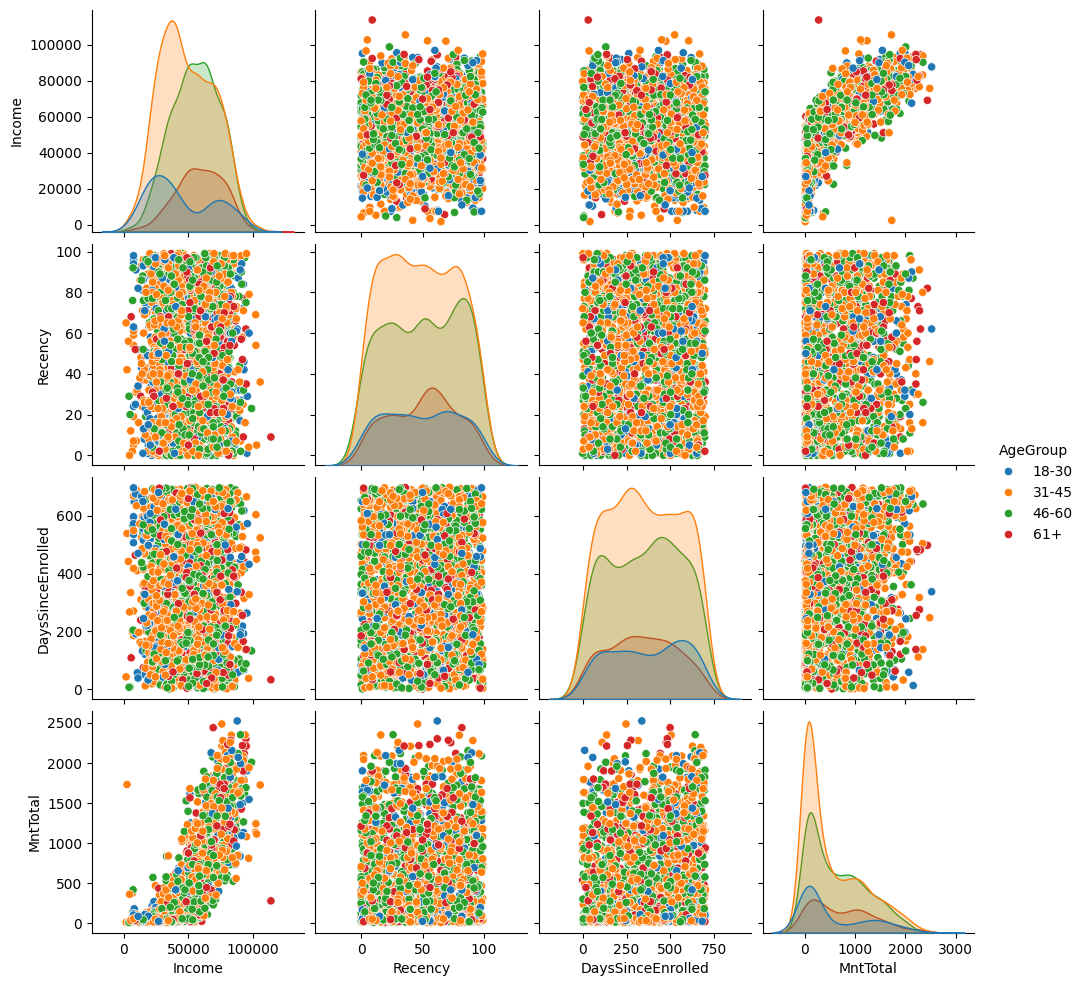

In [13]:
# Analisando pairplot para cada valor de AgeGroup

analysis_columns_without_age = analysis_columns.copy()
analysis_columns_without_age.pop(
    analysis_columns_without_age.index("Age")
)
pairplot(df, analysis_columns_without_age, "AgeGroup")

- Dois picos na distribuição em `Income` para registros da categoria '18-30' de `AgeGroup`
- Concentração em valores pequenos em `Income` para registros da categoria '31-45' de `AgeGroup`
- Concentração de registros da categoria '61+' de `AgeGroup` em valores próximos a 50 em `Recency`

A análise de boxplots também podem trazer alguns insights sobre a base.

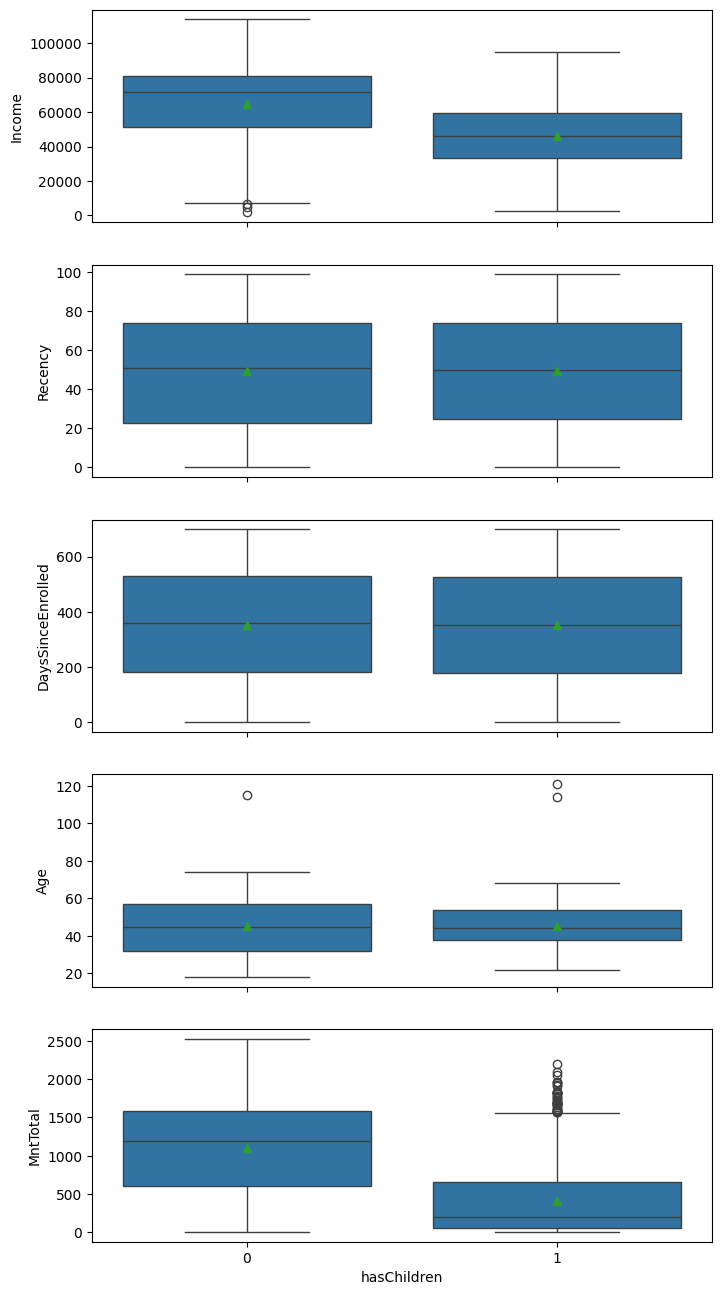

In [14]:
# Boxplot para hasChildren

plot_bivariate_boxplot(df, analysis_columns, "hasChildren")

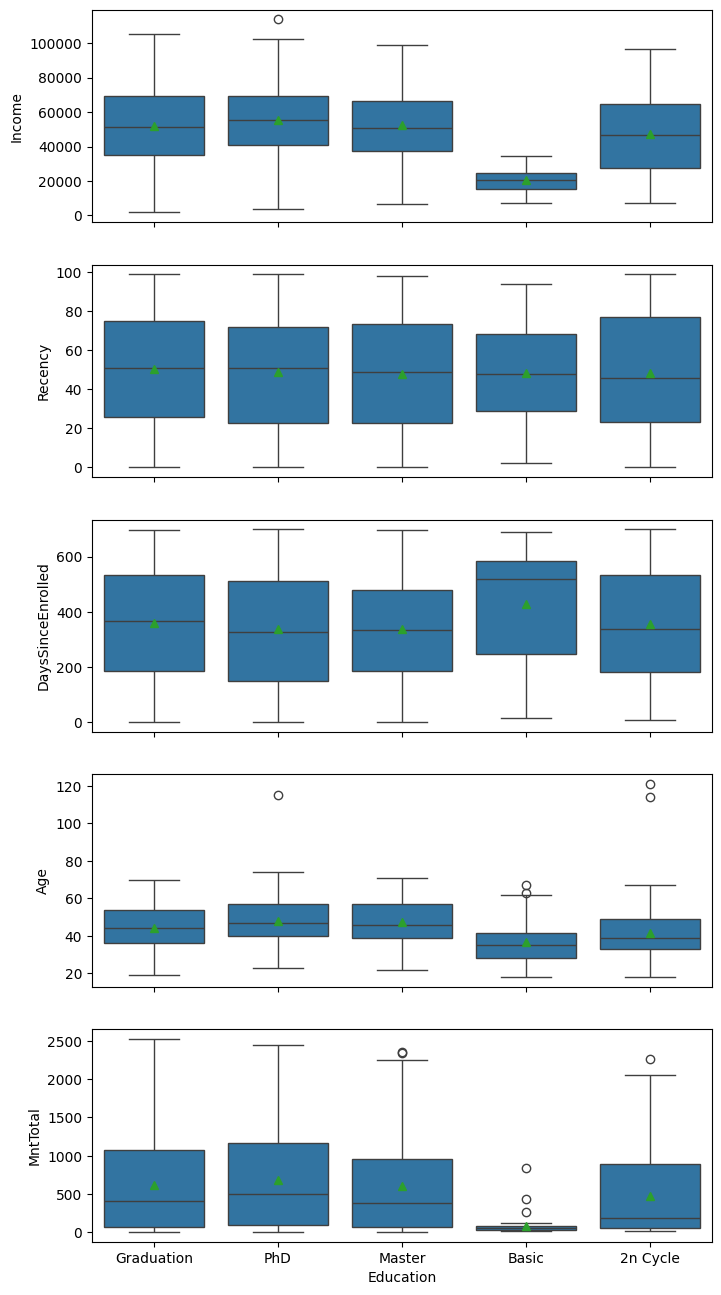

In [15]:
# Boxplot para Education

plot_bivariate_boxplot(df, analysis_columns, "Education")

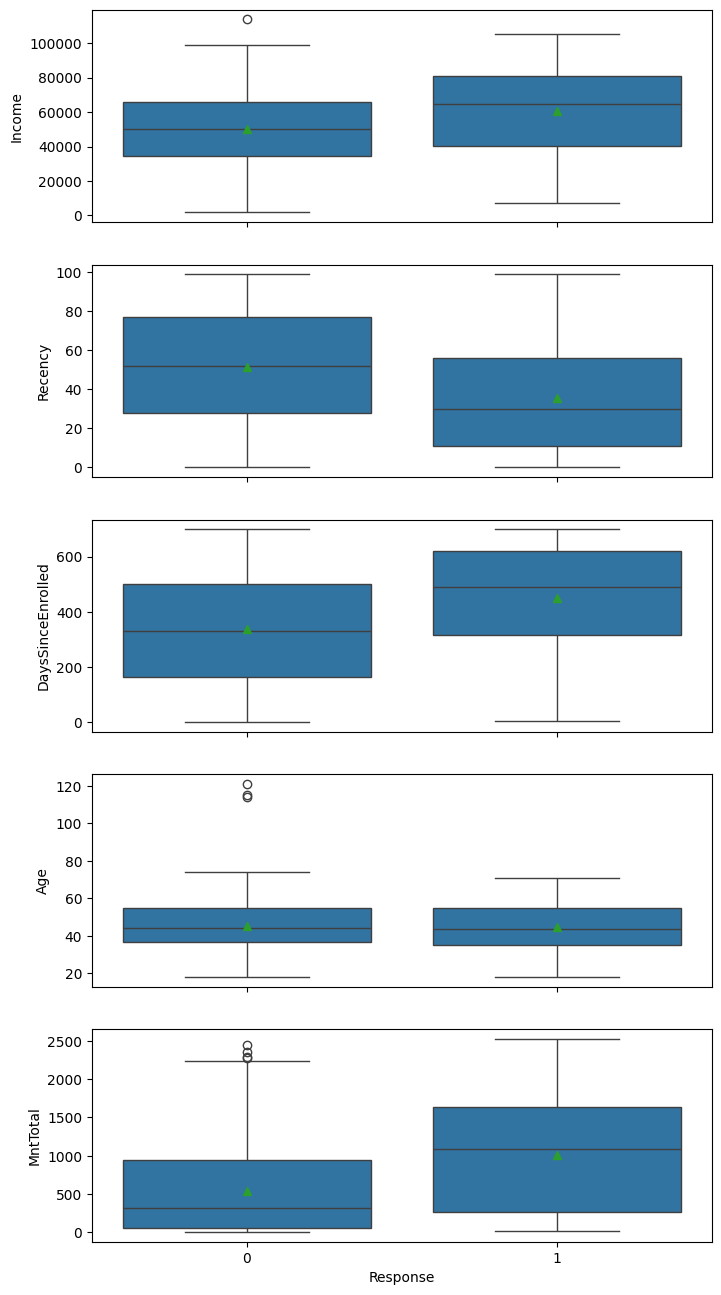

In [16]:
# Boxplot para Response

plot_bivariate_boxplot(df, analysis_columns, "Response")

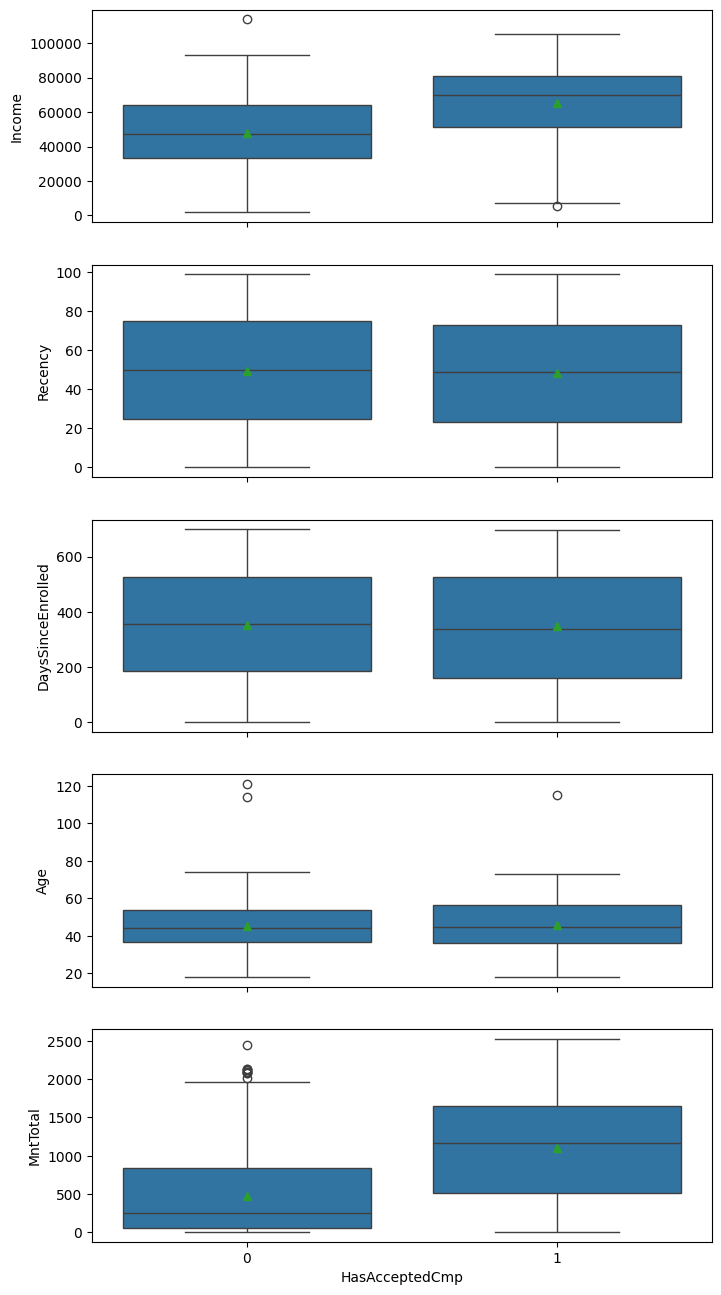

In [17]:
# Boxplot para HasAcceptedCmp

plot_bivariate_boxplot(df, analysis_columns, "HasAcceptedCmp")

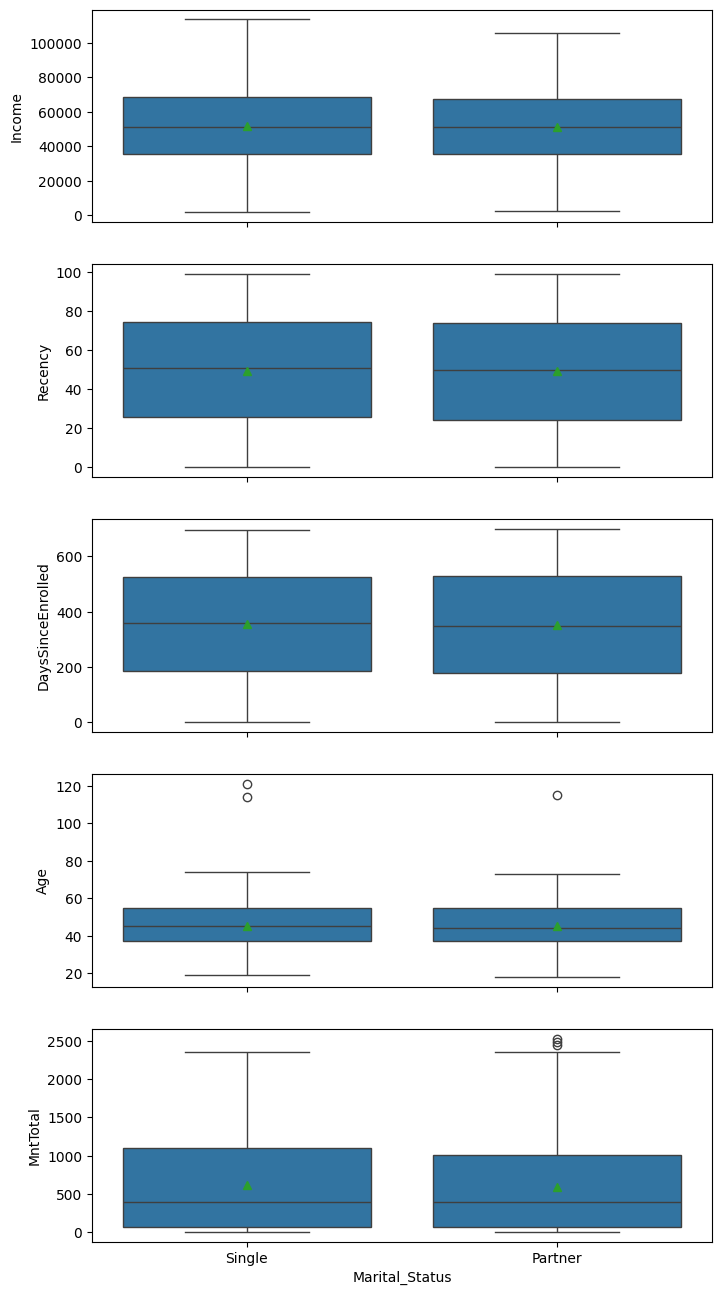

In [18]:
# Boxplot para Marital_Status

plot_bivariate_boxplot(df, analysis_columns, "Marital_Status")

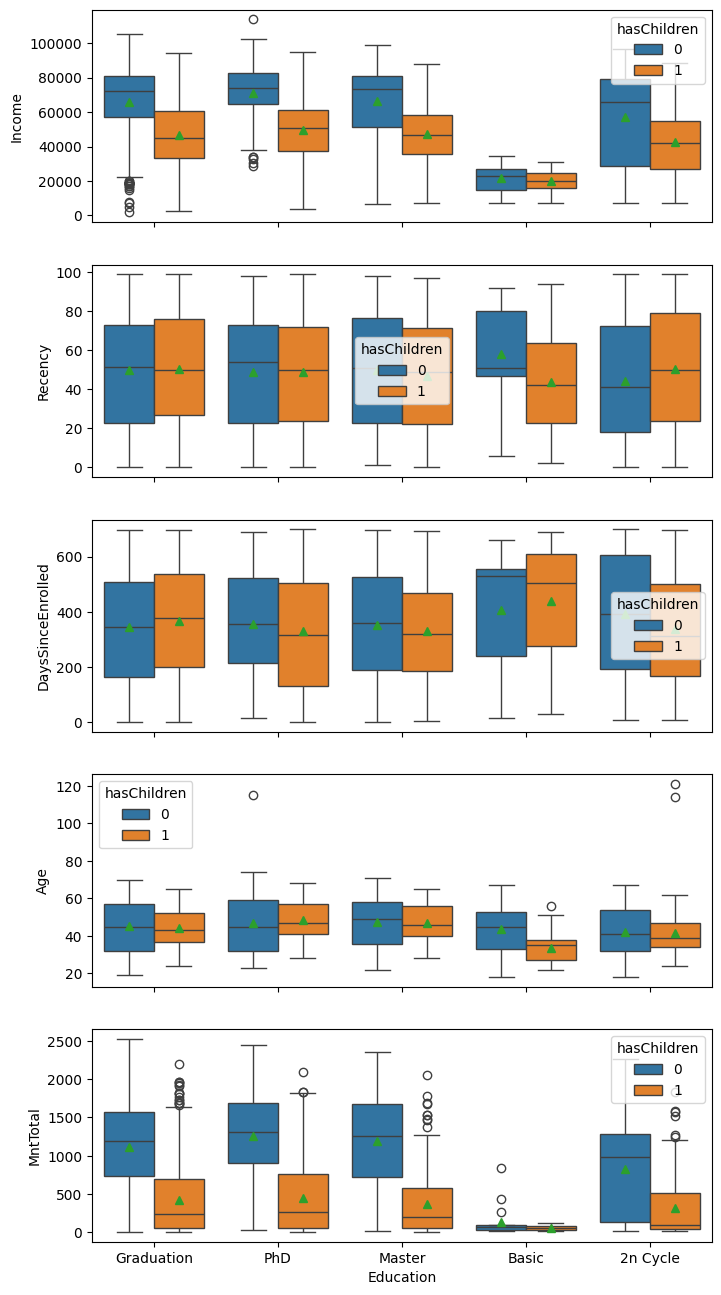

In [19]:
# Boxplot para Education e hasChildren
plot_bivariate_boxplot(df, analysis_columns, "Education", "hasChildren")

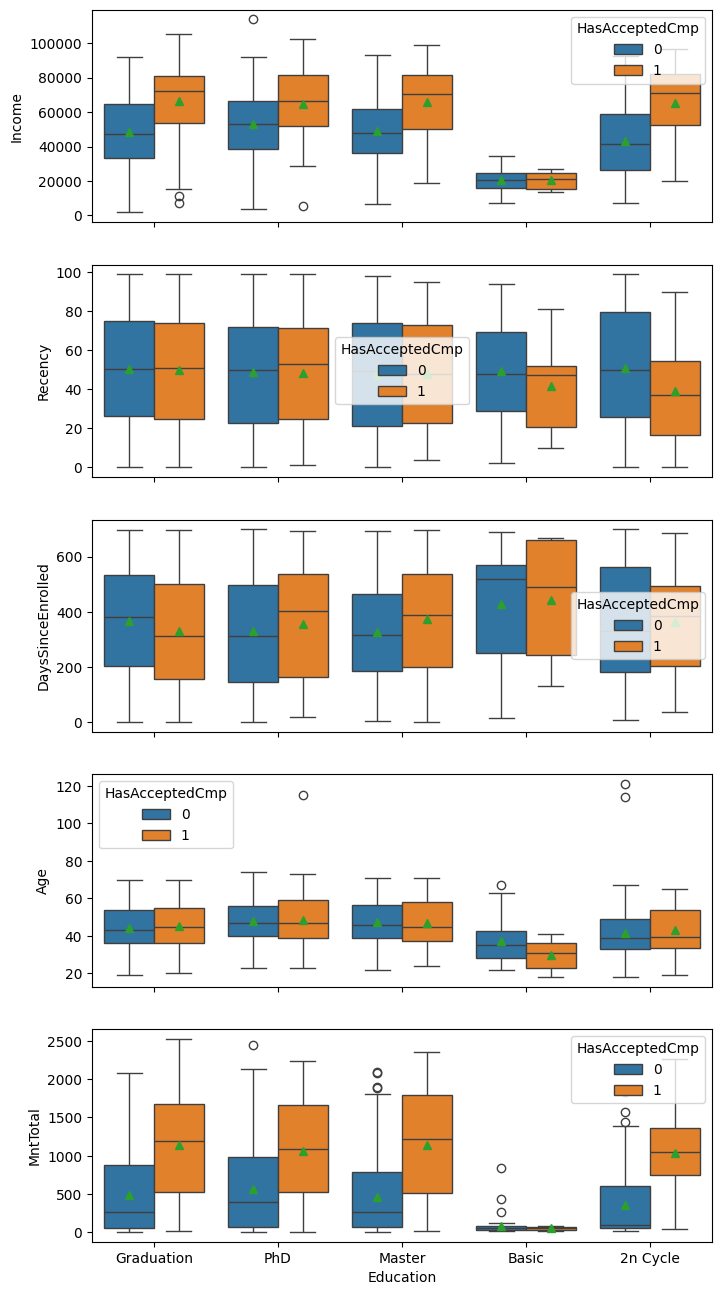

In [20]:
# Boxplot para Education e HasAcceptedCmp
plot_bivariate_boxplot(df, analysis_columns, "Education", "HasAcceptedCmp")

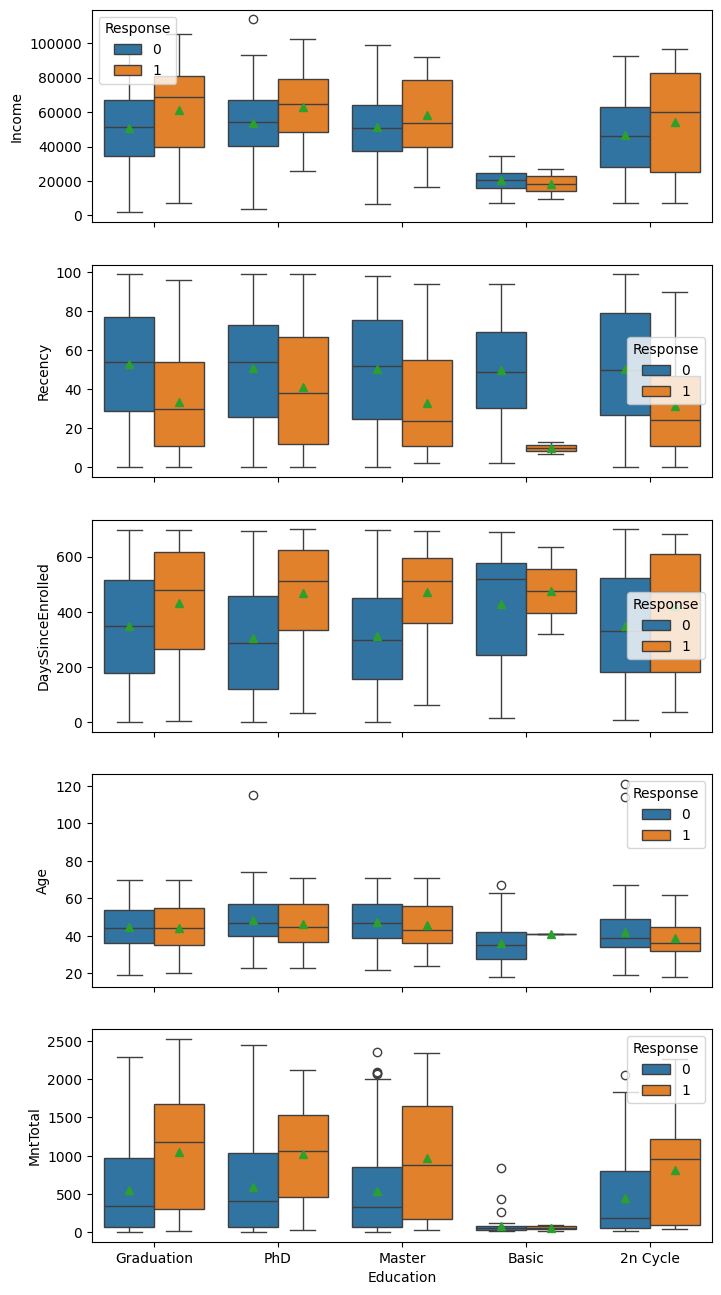

In [21]:
# Boxplot para Education e Response
plot_bivariate_boxplot(df, analysis_columns, "Education", "Response")

In [22]:
# Gerando dummies das colunas categóricas para matriz de correlação
df_dummies = pd.get_dummies(df)
df_dummies.head()

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  Education_Basic  \
0              172                88            88  ...            False   
1                2                 1             6  ...            False   
2              111                21            42  ...            False   
3               10                 3             5  ...            False   
4               46                27            15  ...            False   

   Education_Graduation  Education_Master  Education_PhD  \
0                  True             False          False   
1                  True             False          False   
2                  True             False          False   
3                  True             False          False   
4                 False             False           True   

   Marital_Status_Partner  Marital_Status_Single  AgeGroup_18-30  \
0                   False                   True           False   
1                   False                   True           False   
2                    True                  False           False   
3                    True                  False            True   
4                    True                  False           False   

   AgeGroup_31-45  AgeGroup_46-60  AgeGroup_61+  
0           False            True         False  
1           False            True         False  
2           False            True         False  
3           False           False         False  
4            True           False         False  

[5 rows x 43 columns]

In [23]:
# Salvando o DataFrame de dummies
df_dummies.to_csv(DADOS_DUMMIES, index=False)

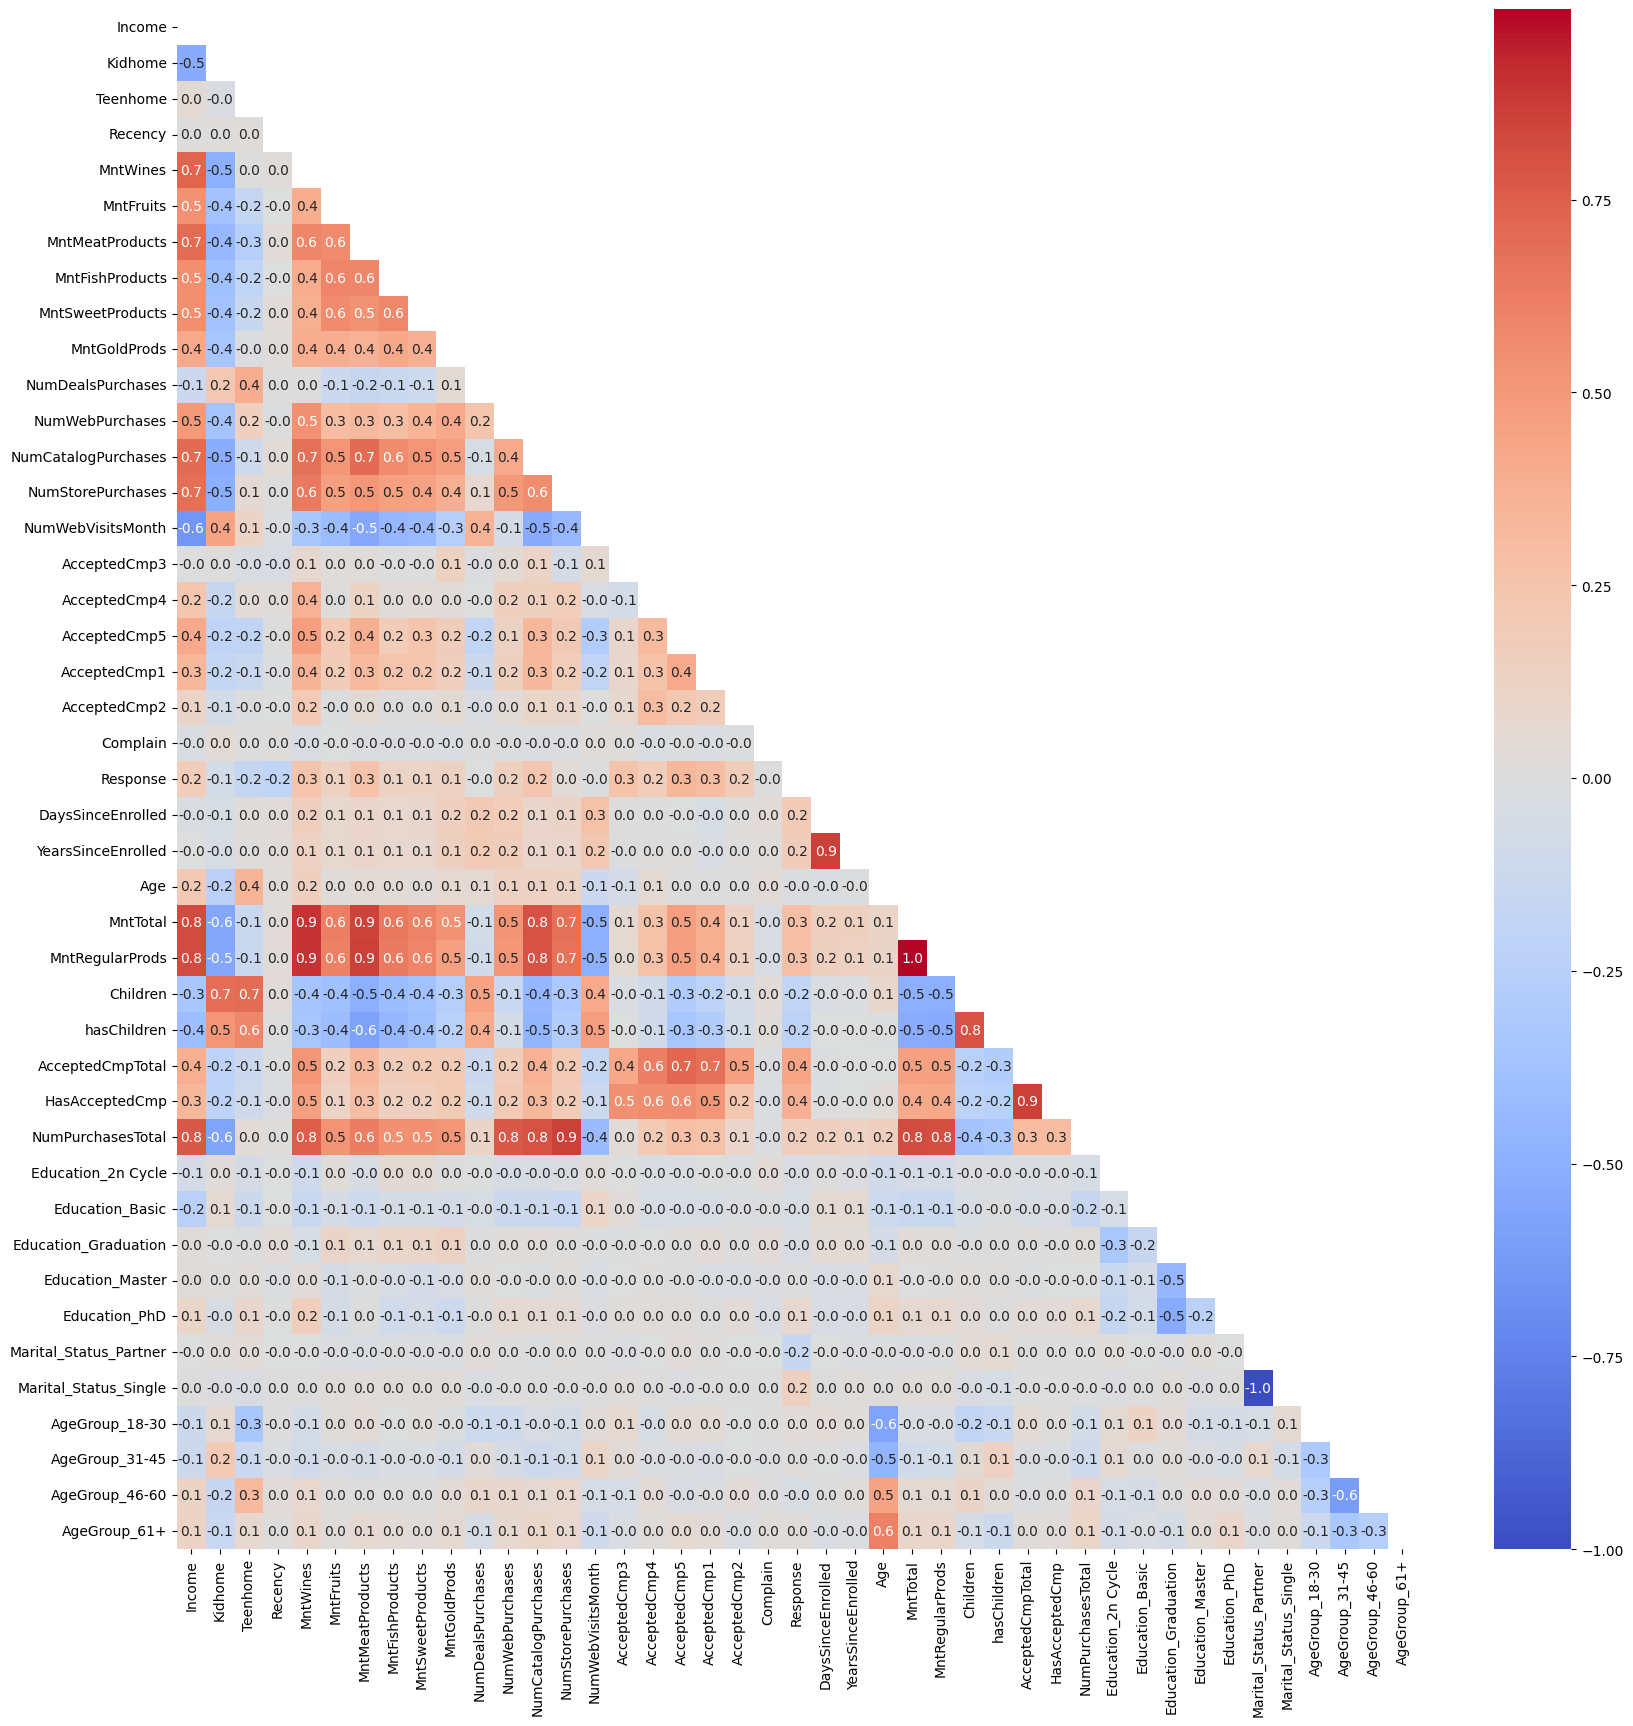

In [24]:
# Matriz de correlação
df_corr = df_dummies.corr()

mask = np.triu(df_corr)

fig, ax = plt.subplots(figsize=(20, 20))

sns.heatmap(
    df_corr,
    mask=mask,
    annot=True,
    fmt=".1f",
    cmap="coolwarm",
    ax=ax,
)

plt.show()

In [25]:
# Armanezando o dataframe de correlação empilhado em uma variável

df_corr_stack = pd.DataFrame(df_corr.stack(), columns=["corr"])
df_corr_stack.head()

corr
Income Income    1.000000
       Kidhome  -0.524680
       Teenhome  0.047324
       Recency   0.008319
       MntWines  0.729954

In [26]:
# Verificando a correlação de Income com as demais colunas
df_corr_stack.loc["Income"].sort_values(by="corr")

corr
NumWebVisitsMonth      -0.643442
Kidhome                -0.524680
hasChildren            -0.404401
Children               -0.342140
Education_Basic        -0.241306
NumDealsPurchases      -0.131924
AgeGroup_18-30         -0.122948
AgeGroup_31-45         -0.119348
Education_2n Cycle     -0.067912
Complain               -0.030392
DaysSinceEnrolled      -0.027737
Marital_Status_Partner -0.008514
AcceptedCmp3           -0.007079
YearsSinceEnrolled     -0.002339
Recency                 0.008319
Marital_Status_Single   0.008514
Education_Master        0.014492
Education_Graduation    0.019942
Teenhome                0.047324
Education_PhD           0.101737
AcceptedCmp2            0.111063
AgeGroup_46-60          0.122234
AgeGroup_61+            0.125183
Response                0.178654
Age                     0.213537
AcceptedCmp4            0.233295
HasAcceptedCmp          0.338293
AcceptedCmp1            0.340961
AcceptedCmpTotal        0.387623
AcceptedCmp5            0.414529
MntGoldProds            0.415098
NumWebPurchases         0.496235
MntFruits               0.534176
MntSweetProducts        0.547251
MntFishProducts         0.549838
NumStorePurchases       0.680571
MntMeatProducts         0.693092
NumCatalogPurchases     0.705344
MntWines                0.729954
NumPurchasesTotal       0.773486
MntRegularProds         0.819173
MntTotal                0.819809
Income                  1.000000

In [27]:
# Verificando a correlação de Age com as demais colunas
df_corr_stack.loc["Age"].sort_values(by="corr")

corr
AgeGroup_18-30         -0.566233
AgeGroup_31-45         -0.463883
Kidhome                -0.231856
NumWebVisitsMonth      -0.130083
Education_Basic        -0.115482
Education_2n Cycle     -0.094841
AcceptedCmp3           -0.066942
Education_Graduation   -0.065153
DaysSinceEnrolled      -0.029769
Response               -0.017325
hasChildren            -0.015357
YearsSinceEnrolled     -0.014230
Marital_Status_Partner -0.009914
AcceptedCmpTotal       -0.002755
AcceptedCmp5            0.001382
AcceptedCmp1            0.004847
AcceptedCmp2            0.006022
Marital_Status_Single   0.009914
Recency                 0.016208
MntFruits               0.021282
MntSweetProducts        0.023347
HasAcceptedCmp          0.027633
Complain                0.029937
MntFishProducts         0.042271
MntMeatProducts         0.042681
AcceptedCmp4            0.050181
NumDealsPurchases       0.060137
MntGoldProds            0.065890
Education_Master        0.074001
Children                0.090430
MntRegularProds         0.114379
MntTotal                0.115153
Education_PhD           0.123104
NumStorePurchases       0.129286
NumCatalogPurchases     0.138287
NumWebPurchases         0.140735
MntWines                0.155628
NumPurchasesTotal       0.166594
Income                  0.213537
Teenhome                0.353706
AgeGroup_46-60          0.450404
AgeGroup_61+            0.608427
Age                     1.000000

In [28]:
# Verificando a correlação de Recency com as demais colunas
df_corr_stack.loc["Recency"].sort_values(by="corr")

corr
Response               -0.197241
AcceptedCmp3           -0.032758
AgeGroup_31-45         -0.029759
Education_Master       -0.022666
AcceptedCmp1           -0.021233
NumWebVisitsMonth      -0.018437
HasAcceptedCmp         -0.017074
AcceptedCmpTotal       -0.014328
NumWebPurchases        -0.011777
Education_PhD          -0.008626
Education_2n Cycle     -0.008206
MntFruits              -0.007011
Education_Basic        -0.005082
AcceptedCmp2           -0.002861
Marital_Status_Partner -0.002194
MntFishProducts        -0.001972
AgeGroup_18-30         -0.000983
AcceptedCmp5           -0.000483
NumDealsPurchases       0.001228
Marital_Status_Single   0.002194
hasChildren             0.002226
NumStorePurchases       0.005118
Income                  0.008319
NumPurchasesTotal       0.009986
Kidhome                 0.011795
Complain                0.012521
AgeGroup_61+            0.013585
Age                     0.016208
AcceptedCmp4            0.016683
MntGoldProds            0.017251
Teenhome                0.019610
MntWines                0.021530
AgeGroup_46-60          0.022589
Children                0.022701
MntSweetProducts        0.022929
DaysSinceEnrolled       0.023206
MntRegularProds         0.024290
MntTotal                0.024735
YearsSinceEnrolled      0.026047
MntMeatProducts         0.028199
Education_Graduation    0.030134
NumCatalogPurchases     0.031438
Recency                 1.000000

In [29]:
# Verificando a correlação de DaysSinceEnrolled com as demais colunas
df_corr_stack.loc["DaysSinceEnrolled"].sort_values(by="corr")

corr
Kidhome                -0.052458
AcceptedCmp1           -0.045451
Education_PhD          -0.041296
Education_Master       -0.035458
Age                    -0.029769
Income                 -0.027737
Children               -0.026743
AgeGroup_61+           -0.025823
AcceptedCmpTotal       -0.013384
HasAcceptedCmp         -0.012826
Marital_Status_Partner -0.009066
hasChildren            -0.003716
AgeGroup_31-45         -0.002745
AcceptedCmp5           -0.002427
AgeGroup_46-60          0.000257
AcceptedCmp3            0.001037
Education_2n Cycle      0.004756
AcceptedCmp4            0.006237
AcceptedCmp2            0.006824
Marital_Status_Single   0.009066
Teenhome                0.015013
Recency                 0.023206
AgeGroup_18-30          0.030319
Complain                0.034140
Education_Graduation    0.038767
Education_Basic         0.059758
MntFruits               0.071874
MntFishProducts         0.082893
MntSweetProducts        0.086890
NumCatalogPurchases     0.095827
MntMeatProducts         0.099787
NumStorePurchases       0.113302
MntRegularProds         0.153269
MntGoldProds            0.156503
NumPurchasesTotal       0.160177
MntTotal                0.160196
MntWines                0.164538
NumWebPurchases         0.185476
Response                0.195675
NumDealsPurchases       0.213230
NumWebVisitsMonth       0.271249
YearsSinceEnrolled      0.864026
DaysSinceEnrolled       1.000000

In [30]:
# Verificando a correlação de MntTotal com as demais colunas
df_corr_stack.loc["MntTotal"].sort_values(by="corr")

corr
Kidhome                -0.554837
hasChildren            -0.523639
NumWebVisitsMonth      -0.502430
Children               -0.496778
Education_Basic        -0.138613
Teenhome               -0.135859
AgeGroup_31-45         -0.087990
NumDealsPurchases      -0.080477
Education_2n Cycle     -0.064736
Complain               -0.037460
AgeGroup_18-30         -0.028122
Marital_Status_Partner -0.017574
Education_Master       -0.003860
Marital_Status_Single   0.017574
Recency                 0.024735
Education_Graduation    0.029428
AgeGroup_46-60          0.050869
AcceptedCmp3            0.056523
Education_PhD           0.065580
AgeGroup_61+            0.087717
Age                     0.115153
AcceptedCmp2            0.138056
YearsSinceEnrolled      0.148340
DaysSinceEnrolled       0.160196
AcceptedCmp4            0.256565
Response                0.274458
AcceptedCmp1            0.382145
HasAcceptedCmp          0.418757
AcceptedCmpTotal        0.460975
AcceptedCmp5            0.469062
NumWebPurchases         0.526642
MntGoldProds            0.530219
MntSweetProducts        0.602151
MntFruits               0.615210
MntFishProducts         0.646036
NumStorePurchases       0.679069
NumCatalogPurchases     0.799586
Income                  0.819809
NumPurchasesTotal       0.821261
MntMeatProducts         0.854301
MntWines                0.897320
MntRegularProds         0.997069
MntTotal                1.000000

In [31]:
# Verificando a correlação de Response com as demais colunas
df_corr_stack.loc["Response"].sort_values(by="corr")

corr
hasChildren            -0.216987
Recency                -0.197241
Children               -0.181019
Teenhome               -0.165527
Marital_Status_Partner -0.152265
Kidhome                -0.084785
Education_Basic        -0.048246
AgeGroup_46-60         -0.040626
Education_2n Cycle     -0.038679
Education_Graduation   -0.035394
Age                    -0.017325
NumWebVisitsMonth      -0.012165
NumDealsPurchases      -0.005392
Complain               -0.000147
Education_Master        0.005374
AgeGroup_31-45          0.010342
AgeGroup_61+            0.015401
AgeGroup_18-30          0.028044
NumStorePurchases       0.039058
Education_PhD           0.083883
MntFishProducts         0.116146
MntSweetProducts        0.121442
MntFruits               0.132259
MntGoldProds            0.137094
NumWebPurchases         0.152151
Marital_Status_Single   0.152265
NumPurchasesTotal       0.169706
YearsSinceEnrolled      0.172170
AcceptedCmp2            0.175969
Income                  0.178654
AcceptedCmp4            0.179307
DaysSinceEnrolled       0.195675
NumCatalogPurchases     0.239451
MntWines                0.252297
MntMeatProducts         0.257468
AcceptedCmp3            0.261548
MntRegularProds         0.274414
MntTotal                0.274458
AcceptedCmp1            0.301443
AcceptedCmp5            0.335749
HasAcceptedCmp          0.374697
AcceptedCmpTotal        0.435204
Response                1.000000

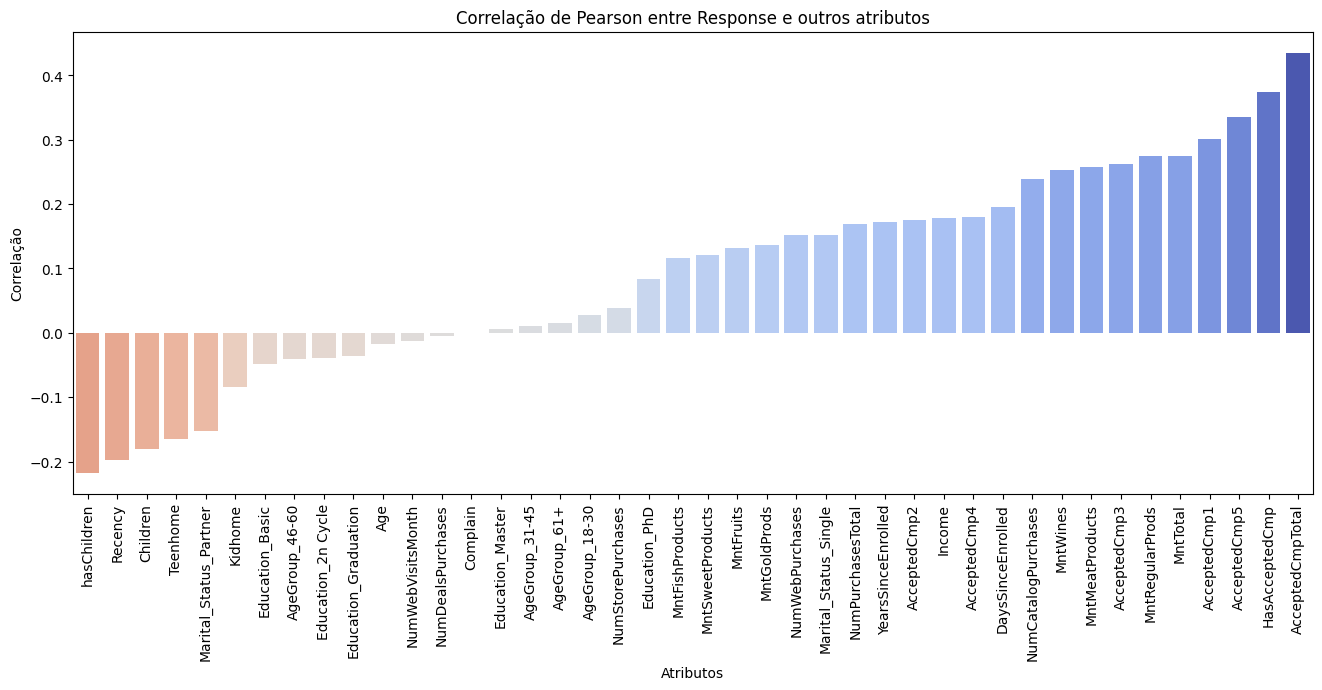

In [32]:
# Verificando a correlação de Response com os outros atributos
plot_corr_barplot(df_dummies, "Response")

In [33]:
# Salvando as mudanças
#df.to_parquet(DADOS_TRATADOS, index=False)